In [ ]:
import pandas as pd

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

# from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("data/advertising.csv", index_col="id")

In [3]:
X = df[["tv", "radio", "newspaper"]]
y = df["sales"].values

In [4]:
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=42)

In [5]:
model = RandomForestRegressor(random_state=42)

In [6]:
ns = []
train_mses = []
test_mses = []

for n in range(5, 200, 5):
    
    model = RandomForestRegressor(n_estimators=n, n_jobs=-1, max_features="sqrt")
    model.fit(X_train, y_train)
    
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)

    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)

    ns.append(n)
    train_mses.append(train_mse)
    test_mses.append(test_mse)


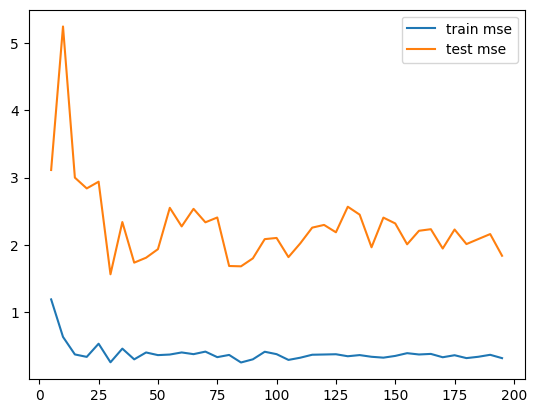

In [7]:
plt.plot(ns, train_mses, label="train mse")
plt.plot(ns, test_mses, label="test mse")
plt.legend()
plt.show()